In [634]:
import numpy as np
import pandas as pd
from pandas_datareader import Options

import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn.apionly as sns
from tqdm import tqdm_notebook as tqdm

# plt.style.use('clean')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [635]:
%run sample_prices.py
%run report/scripts/pricecall.py
%run interpolated_local_vol.py


A Jupyter Widget

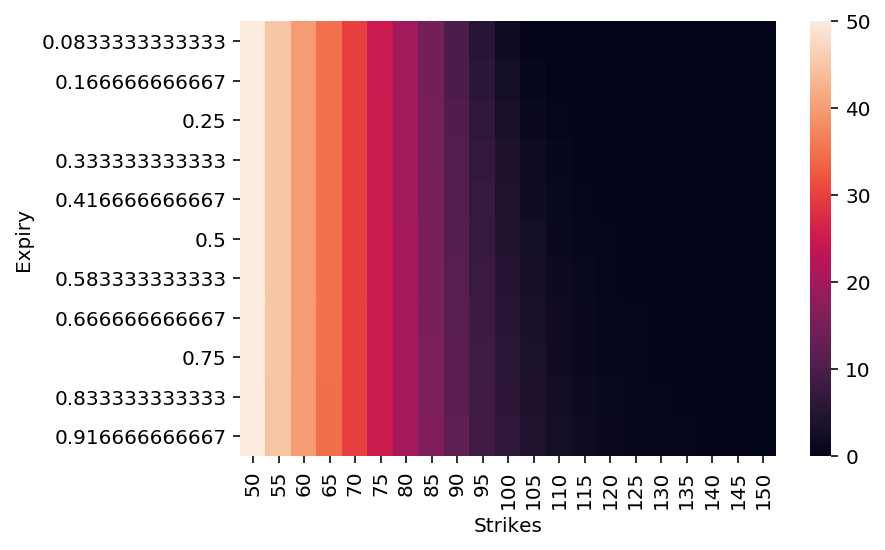

In [662]:
# def quadratic_vol(px, time):
#     return np.clip(.16 + 1e-4*(px-100)**2, 0, .5)

def quadratic_vol(px, time):
    return .16 + 1e-4*(px-100)**2


expiries = np.arange(1/12,13/12,1/12)
K = np.arange(50,151,5)

samples = sample_end_prices(100, quadratic_vol, expiries, 100, int(1e6))
pxs = price_calls(K, samples)

sns.heatmap(pxs)

In [663]:
pxs

Strikes,50,55,60,65,70,75,80,85,90,95,...,105,110,115,120,125,130,135,140,145,150
Expiry,,,,,,,,,,,,,,,,,,,,,
0.083333,49.995046,44.995046,39.995046,34.995046,29.995046,24.995046,19.995046,14.995443,10.014305,5.302794,...,0.360018,0.039407,0.002696,0.000151,0.000008,0.000000,0.000000,0.000000,0.000000,0.000000
0.166667,49.996303,44.996303,39.996303,34.996303,29.996308,24.996409,19.997698,15.014728,10.151584,5.797874,...,0.899271,0.241711,0.053860,0.010678,0.002056,0.000454,0.000127,0.000047,0.000020,0.000008
0.250000,50.008152,45.008152,40.008153,35.008171,30.008333,25.009741,20.020525,15.086347,10.373162,6.262082,...,1.396012,0.526454,0.180286,0.059049,0.019422,0.006832,0.002646,0.001117,0.000534,0.000271
0.333333,50.003737,45.003737,40.003766,35.003965,30.005155,25.011928,20.045474,15.180064,10.610075,6.677056,...,1.842087,0.829275,0.353655,0.149110,0.064029,0.028652,0.013684,0.006930,0.003713,0.002118
0.416667,50.006598,45.006649,40.006845,35.007761,30.012171,25.030169,20.096013,15.305691,10.861141,7.060336,...,2.253660,1.140124,0.557659,0.272889,0.137274,0.072340,0.040351,0.023749,0.014685,0.009496
0.500000,50.002721,45.002869,40.003573,35.006401,30.016422,25.050688,20.156281,15.442547,11.107533,7.413786,...,2.632595,1.442848,0.773807,0.418234,0.233049,0.135334,0.082447,0.052705,0.035193,0.024517
0.583333,49.992025,44.992603,39.994489,35.000605,30.019566,25.075361,20.225792,15.587162,11.347286,7.739149,...,2.980960,1.732806,0.994920,0.576818,0.343920,0.213062,0.137345,0.091993,0.063953,0.045906
0.666667,49.975101,44.976494,39.980444,34.991711,30.022777,25.104323,20.301652,15.733241,11.577822,8.042533,...,3.306052,2.011032,1.213541,0.740825,0.464229,0.300637,0.202002,0.140942,0.101997,0.076357
0.750000,49.938888,44.941766,39.949029,34.967537,30.013624,25.123310,20.366262,15.860998,11.779437,8.307113,...,3.592690,2.259806,1.412085,0.891963,0.575958,0.382619,0.261858,0.184768,0.134274,0.100328


KeyError: (95, 0.16666666666666666)

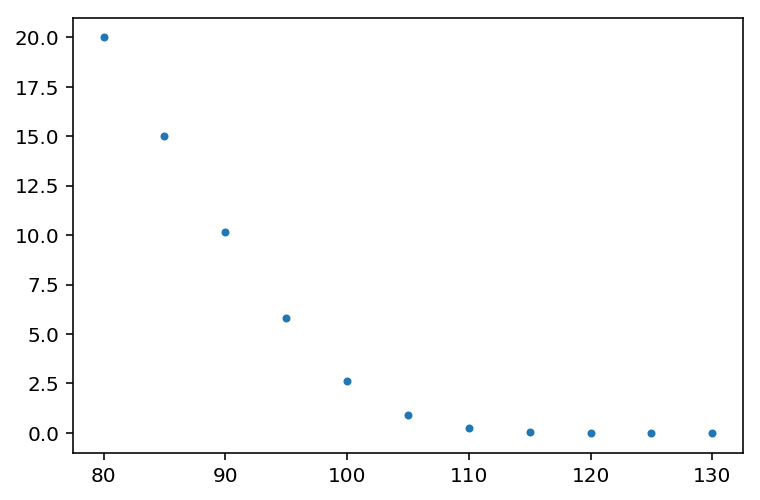

In [666]:
t = 2/12
plt.plot(pxs.loc[t,80:130],'.')
quad = np.vectorize(lambda k : np.array([1,k,t,k ** 2, k * t, t ** 2,]).dot(d[95,t]))
ks = np.linspace(80,130,100)
plt.plot(ks, quad(ks))

In [500]:
pd.DataFrame(d)

30                                                               \
          1.0         1.5         2.0         2.5         3.0         3.5   
0  100.057285  100.206839  100.520471  100.847552  100.878632  101.225799   
1   -1.003399   -1.009664   -1.020700   -1.036267   -1.054149   -1.071859   
2   -0.040569   -0.154201   -0.338323   -0.418130   -0.239518   -0.306020   
3    0.000047    0.000114    0.000216    0.000356    0.000518    0.000688   
4    0.001332    0.003325    0.006174    0.009362    0.012294    0.014565   
5    0.006981    0.030309    0.058110    0.052773    0.003997    0.005608   

                      35                             ...          185  \
          4.0         1.0         1.5         2.0    ...          3.0   
0  102.341574  100.119049  100.371970  100.829914    ...     4.697155   
1   -1.088003   -1.005984   -1.015380   -1.030449    ...    -0.069407   
2   -0.788575   -0.092057   -0.263793   -0.500964    ...     2.991753   
3    0.000851    0.000072    0.000157    0.000280    ...     0.000193   
4    0.016229    0.002333    0.005249    0.008988    ...    -0.010051   
5    0.063954    0.016791    0.046298    0.076116    ...     0.087445   

                            190                                          \
        3.5       4.0       1.0       1.5       2.0       2.5       3.0   
0  5.462584  6.977100  1.738095  2.168419  2.835051  3.791231  4.396592   
1 -0.078569 -0.086662 -0.020667 -0.029050 -0.040694 -0.053624 -0.064616   
2  3.038993  2.621660  1.290791  1.816660  2.298455  2.553291  2.890116   
3  0.000204  0.000211  0.000061  0.000094  0.000130  0.000159  0.000178   
4 -0.008487 -0.007079 -0.008163 -0.011183 -0.012057 -0.011179 -0.009774   
5  0.037587  0.059610  0.378490  0.389923  0.299908  0.205616  0.095709   

                       
        3.5       4.0  
0  5.141071  6.615138  
1 -0.073657 -0.081483  
2  2.957531  2.558494  
3  0.000189  0.000197  
4 -0.008330 -0.007000  
5  0.045028  0.065642  

[6 rows x 231 columns]

array([ 0.        ,  2.7907286 ,  2.64082195,  2.50085704,  2.37005299,
        2.24767588,  3.68703928,  3.51362277,  3.35077021,  3.1977337 ,
        3.05379733,  4.56542282,  4.37346902,  4.19202414,  4.02071765,
        3.8587509 ,  5.48291627,  5.27473697,  5.07726208,  4.8897139 ,
        4.71152881,  6.45298908,  6.23131784,  6.02071374,  5.82016537,
        5.6289911 ])

In [638]:
from sklearn.preprocessing import PolynomialFeatures
def compute_derivatives(coeffs, strike, expiry, deg=2):
    if deg == 2:
        return (coeffs[2] + coeffs[4] * strike + 2 * coeffs[5] * expiry, 
                2 * coeffs[3])
    else:
        return (coeffs[2] + coeffs[4] * strike + 2 * coeffs[5] * expiry
                + coeffs[7] * strike ** 2 + 2 * coeffs[8] * strike * expiry
                + 3 * coeffs[9] * expiry ** 2,
                2 * coeffs[3] + 6 * coeffs[6] * strike + 2 * coeffs[7] * expiry)

local_vol2 = np.zeros((len(pxs) - 4, len(pxs.columns) - 4))
dCdTs = np.zeros((len(pxs) - 4, len(pxs.columns) - 4))
d2CdK2s = np.zeros((len(pxs) - 4, len(pxs.columns) - 4))
d = {}
for i in range(2, len(pxs)-2):
    for j in range(2, len(pxs.columns)-2):
#         if i == 2:
#             local = pxs.iloc[i-1:i+4,j-2:j+3]
#         else:
        local = pxs.iloc[i-2:i+3,j-2:j+3]
        strike = pxs.columns[j]
        expiry = pxs.index[i]
        strikes, expiries = np.meshgrid(local.columns, local.index)
        poly = PolynomialFeatures(degree=2)
        features = poly.fit_transform(np.vstack([strikes.flatten(), expiries.flatten()]).T)
#         coeffs, _, _, _ = np.linalg.lstsq(
#             np.vstack([np.array([0,0,0,1/(0.01 + 10 * (strike/100-1) ** 2),0,0]).reshape(-1,6), features]), 
#             np.hstack([np.array([0]), (local.as_matrix().flatten())]))
        coeffs, _, _, _ = np.linalg.lstsq(features, local.as_matrix().flatten())
        d[strike, expiry] = coeffs
        dCdT, d2CdK2 = compute_derivatives(coeffs, strike, expiry, deg=2)
        local_vol2[i-2, j-2] = dCdT / (1/2 * (strike ** 2) * d2CdK2)
        dCdTs[i-2,j-2] = dCdT
        d2CdK2s[i-2,j-2] = d2CdK2
local_vol2 = pd.DataFrame(local_vol2, columns=pxs.columns[2:-2], index=pxs.index[2:-2])

In [538]:
pd.DataFrame(d)

30                                                               \
          1.0         1.5         2.0         2.5         3.0         3.5   
0  100.057285  100.206838  100.520471  100.847551  100.878632  101.225799   
1   -1.003399   -1.009664   -1.020700   -1.036267   -1.054149   -1.071859   
2   -0.040569   -0.154201   -0.338323   -0.418130   -0.239518   -0.306020   
3    0.000047    0.000114    0.000216    0.000356    0.000518    0.000688   
4    0.001332    0.003325    0.006174    0.009362    0.012294    0.014565   
5    0.006981    0.030309    0.058110    0.052773    0.003997    0.005608   

                      35                             ...          185  \
          4.0         1.0         1.5         2.0    ...          3.0   
0  102.341573  100.119049  100.371970  100.829914    ...     4.697152   
1   -1.088003   -1.005984   -1.015380   -1.030449    ...    -0.069407   
2   -0.788575   -0.092057   -0.263793   -0.500964    ...     2.991753   
3    0.000851    0.000072    0.000157    0.000280    ...     0.000193   
4    0.016229    0.002333    0.005249    0.008988    ...    -0.010051   
5    0.063954    0.016791    0.046298    0.076116    ...     0.087445   

                            190                                          \
        3.5       4.0       1.0       1.5       2.0       2.5       3.0   
0  5.462581  6.977097  1.738094  2.168418  2.835049  3.791229  4.396590   
1 -0.078569 -0.086662 -0.020667 -0.029050 -0.040694 -0.053624 -0.064616   
2  3.038993  2.621660  1.290791  1.816660  2.298455  2.553291  2.890116   
3  0.000204  0.000211  0.000061  0.000094  0.000130  0.000159  0.000178   
4 -0.008487 -0.007079 -0.008163 -0.011183 -0.012057 -0.011179 -0.009774   
5  0.037587  0.059610  0.378490  0.389923  0.299908  0.205616  0.095709   

                       
        3.5       4.0  
0  5.141069  6.615136  
1 -0.073657 -0.081483  
2  2.957531  2.558494  
3  0.000189  0.000197  
4 -0.008330 -0.007000  
5  0.045028  0.065642  

[6 rows x 231 columns]

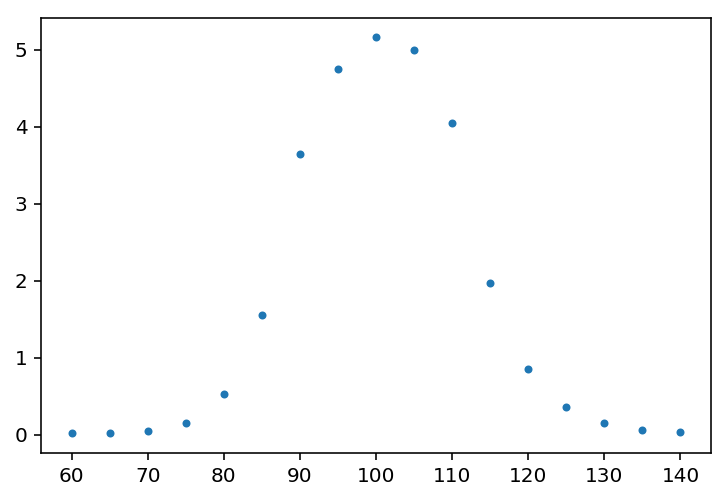

In [623]:
plt.plot(K[2:-2], dCdTs[0,:],'.')

In [624]:
local = pxs.iloc[1-1:1+2,16-1:16+2]

In [541]:
d2CdK2s[0,:]

array([  9.42340573e-05,   1.43190166e-04,   2.13785811e-04,
         3.33913554e-04,   5.39122174e-04,   8.82627124e-04,
         1.43576120e-03,   2.33118684e-03,   3.76915637e-03,
         6.00217289e-03,   9.21463961e-03,   1.32470927e-02,
         1.72852199e-02,   3.09046151e-02,   3.04821487e-02,
         2.88899115e-02,   1.41526415e-02,   1.01865137e-02,
         6.89122405e-03,   4.51825577e-03,   2.92835551e-03,
         1.89721566e-03,   1.23634792e-03,   8.16430586e-04,
         5.51530267e-04,   3.88210590e-04,   2.94726562e-04,
         2.39663820e-04,   2.03458970e-04,   1.76614910e-04,
         1.55762246e-04,   1.38256770e-04,   1.21688939e-04])

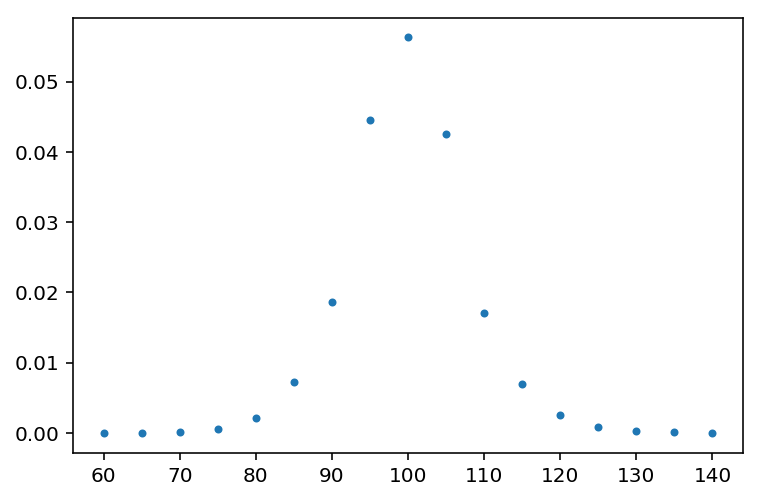

In [625]:
plt.plot(K[2:-2], d2CdK2s[0,:],'.')


(0, 1)

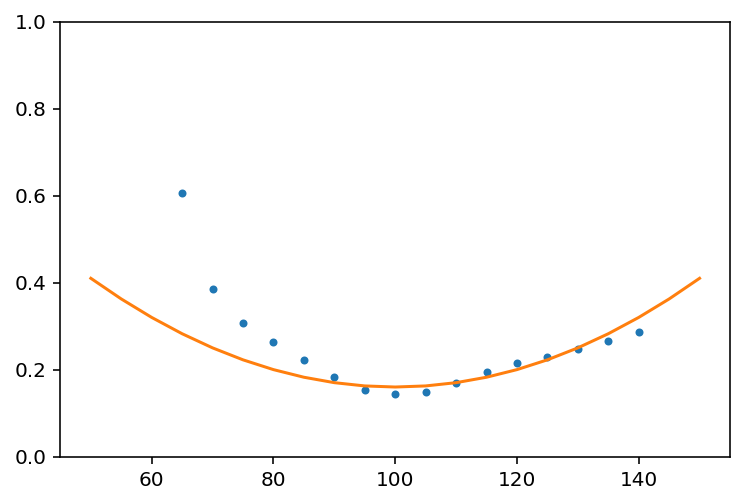

In [640]:
plt.plot(K[2:-2], np.sqrt(local_vol2.iloc[0,:]),'.')
plt.plot(K, quadratic_vol(K, 1))
plt.ylim(0,1)

In [354]:
np.diff([1,2,3])

array([1, 1])

In [294]:
poly.transform(np.array([2,0]).reshape((1,2)))
1 + stk + exp + stk^2 + xy + exp^2

array([[ 1.,  2.,  0.,  4.,  0.,  0.]])

In [ ]:
def get_local_quad_local_vol(C_grid):
    

In [225]:
def get_fd_local_vol(C_grid):
#     if index_is_dt:
#         dts = np.diff(C_grid.index).astype('timedelta64[D]').astype('float') / 252
#     else:
    dts = np.diff(C_grid.index)
    
    dCdt = np.clip((C_grid.as_matrix()[1:,:] - C_grid.as_matrix()[:-1,:]) / dts[:,np.newaxis], a_min=0, a_max=None)
    dCdt_compatible = (dCdt[1:,1:-1] + dCdt[:-1,1:-1]) / 2
    #assert len(set(np.diff(C_grid.columns))) == 1
    Kdiff = np.diff(C_grid.columns)[0]
    d2CdK2 = (C_grid.as_matrix()[:,:-2] + C_grid.as_matrix()[:,2:] - 2*C_grid.as_matrix()[:,1:-1]) / Kdiff**2
    d2CdK2_compatible = d2CdK2[1:-1,:]    
    new_expiries = C_grid.index[1:-1]
    new_strikes = np.array(C_grid.columns[1:-1])
    
    return pd.DataFrame(dCdt_compatible/(1/2 * np.array(new_strikes ** 2).reshape(1,-1) * np.abs(d2CdK2_compatible)), 
                        index=new_expiries, 
                        columns=new_strikes)

In [243]:
local_vols2 = get_fd_local_vol(pxs)

In [227]:
local_vols2

,25,30,35,40,45,50,55,60,65,70,...,150,155,160,165,170,175,180,185,190,195
Expiry,,,,,,,,,,,,,,,,,,,,,
1.0,60.563566,11.370721,5.746120,2.571385,0.913580,0.414142,0.216726,0.112682,0.075215,0.055314,...,0.153631,0.189324,0.226321,0.232478,0.241208,0.272740,0.273202,0.228039,0.255616,0.242244
1.5,5.046291,1.518719,0.733430,0.424355,0.239761,0.187357,0.140722,0.104613,0.077442,0.061731,...,0.155854,0.193389,0.232444,0.234878,0.261588,0.249454,0.252292,0.222972,0.228945,0.239251
2.0,2.245592,1.146340,0.570480,0.440596,0.297237,0.221080,0.156734,0.111839,0.086014,0.067057,...,0.156075,0.190681,0.228791,0.253021,0.253944,0.277971,0.264100,0.253811,0.234680,0.243716
2.5,1.087505,0.575277,0.341501,0.312028,0.259641,0.183138,0.148535,0.110980,0.083650,0.064584,...,0.166391,0.198137,0.227693,0.229100,0.212879,0.248935,0.263927,0.245351,0.228682,0.270148
3.0,0.615372,0.392496,0.294389,0.272341,0.237880,0.180469,0.143493,0.105918,0.080643,0.064811,...,0.174718,0.217346,0.246424,0.280329,0.248582,0.273265,0.264428,0.269620,0.261285,0.317530
3.5,0.425312,0.301474,0.223630,0.189015,0.148112,0.113691,0.094585,0.082464,0.067848,0.053599,...,0.167192,0.210450,0.225599,0.231601,0.250443,0.236996,0.244062,0.247695,0.249905,0.220914
4.0,1.249359,0.811568,0.595450,0.465422,0.326895,0.225789,0.170619,0.122489,0.091541,0.070937,...,0.165693,0.221323,0.247152,0.226151,0.281689,0.258665,0.287474,0.264468,0.266945,0.276484
4.5,1.052383,0.729750,0.521251,0.401221,0.309307,0.216105,0.160584,0.119011,0.093808,0.071178,...,0.170475,0.222492,0.237448,0.281888,0.268800,0.250010,0.244788,0.257945,0.266683,0.273693
5.0,0.000000,0.004857,0.041585,0.062465,0.064421,0.061009,0.060993,0.055751,0.047696,0.041891,...,0.137932,0.173083,0.188605,0.199241,0.202629,0.198575,0.223152,0.195797,0.213541,0.215235


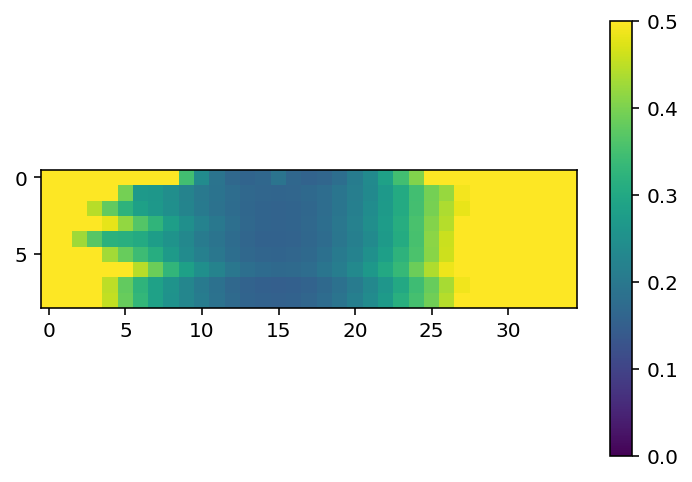

In [111]:
plt.imshow(np.sqrt(local_vols2), clim=(0,0.5))
plt.colorbar()

(0, 1)

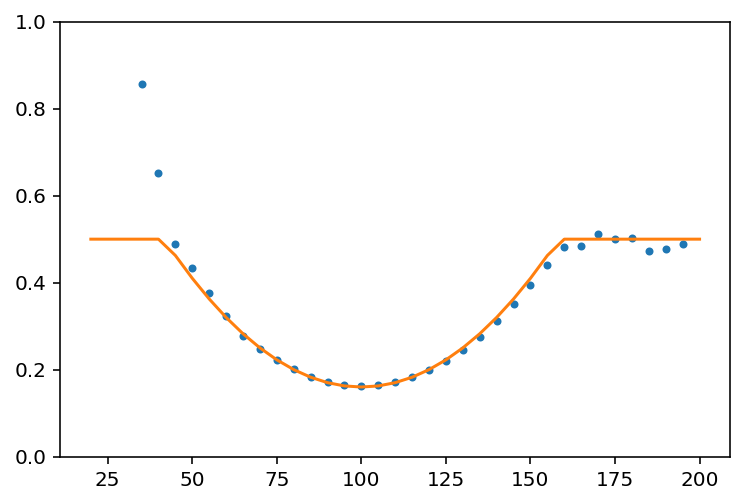

In [244]:
plt.plot(np.sqrt(local_vols2).loc[1.5,:], '.')
plt.plot(K, np.clip(.16 + 1e-4*(K-100)**2,0,0.5))
plt.ylim((0,1))

In [245]:
local_vol2 = np.clip(local_vol2, 0, .5 ** 2)

In [641]:
f = InterpolatedLocalVol(np.sqrt(np.clip(local_vol2, 0, .5 ** 2).as_matrix().T), 
                         local_vol2.columns, local_vol2.index)

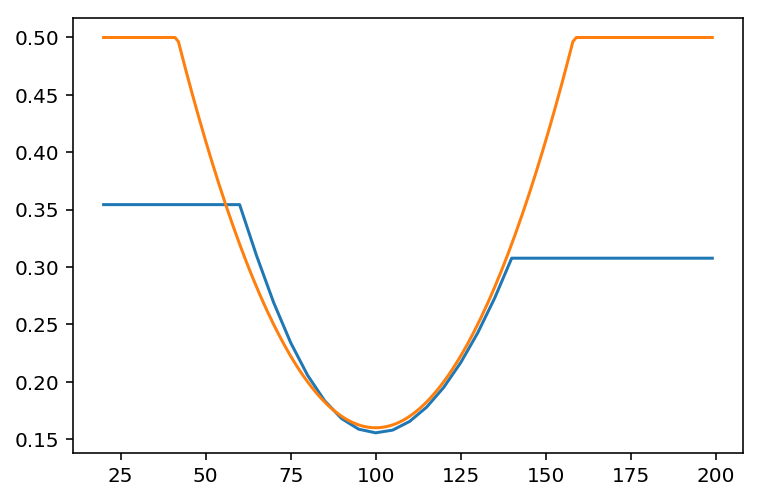

In [644]:
xs = np.arange(20,200,1)
plt.plot(xs,f(xs,2))
plt.plot(xs, np.clip(.16 + 1e-4*(xs-100)**2,0,0.5))

In [42]:
f(np.array([1,1]),2).reshape(-1)

array([ 0.3,  0.3])

In [41]:
quadratic_vol(np.array([1,1]),2)

array([ 0.3,  0.3])

In [653]:
f(np.array([80,100]),1)
def min_vol(s,t):
    #return np.minimum(f(s,t).reshape(-1), quadratic_vol(s,t))
    return quadratic_vol(s,t) + 0.05 * np.random.randn(len(s))

%time f_samples = sample_end_prices(100, f, np.arange(1/12,1,1/12), 8, int(1e5))


A Jupyter Widget


CPU times: user 286 ms, sys: 11.8 ms, total: 297 ms
Wall time: 315 ms


In [654]:
f_pxs = price_calls(K, f_samples)

In [655]:
f_pxs

Strikes,50,55,60,65,70,75,80,85,90,95,...,105,110,115,120,125,130,135,140,145,150
Expiry,,,,,,,,,,,,,,,,,,,,,
0.083333,49.988966,44.988966,39.988966,34.988966,29.988966,24.988966,19.988966,14.989162,10.002197,5.267494,...,0.329185,0.029995,0.001201,0.000037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.166667,49.974807,44.974807,39.974807,34.974807,29.974807,24.974823,19.975291,14.985721,10.104453,5.729595,...,0.840058,0.203209,0.036212,0.005183,0.000539,0.000013,0.000000,0.000000,0.000000,0.000000
0.250000,49.981901,44.981901,39.981901,34.981901,29.981901,24.982030,19.986351,15.034973,10.301685,6.190707,...,1.333449,0.467864,0.136118,0.032858,0.006649,0.001183,0.000181,0.000004,0.000000,0.000000
0.333333,49.974470,44.974470,39.974470,34.974470,29.974558,24.976132,19.995028,15.107438,10.526995,6.607062,...,1.773545,0.754092,0.283420,0.095115,0.027934,0.007263,0.001654,0.000231,0.000033,0.000000
0.416667,49.963962,44.963962,39.963962,34.964008,29.964536,24.971828,20.018221,15.208325,10.762044,6.985631,...,2.191605,1.053039,0.458691,0.182873,0.066539,0.022145,0.006709,0.002051,0.000723,0.000107
0.500000,49.938969,44.938969,39.939023,34.939262,29.941848,24.959776,20.042704,15.317458,11.001309,7.350308,...,2.574959,1.352159,0.656810,0.297443,0.125577,0.050676,0.019799,0.007044,0.002587,0.000913
0.583333,49.954559,44.954559,39.954618,34.955774,29.962948,24.998054,20.125456,15.480740,11.272408,7.715182,...,2.962097,1.663087,0.876087,0.436335,0.205851,0.092907,0.040160,0.016684,0.006951,0.002961
0.666667,49.964142,44.964142,39.964371,34.967360,29.982135,25.037720,20.214283,15.655012,11.550858,8.076486,...,3.343067,1.976726,1.112167,0.597916,0.310547,0.155949,0.075135,0.036656,0.017404,0.008464
0.750000,49.968956,44.969082,39.970246,34.976131,30.000383,25.083510,20.312619,15.830266,11.817404,8.418303,...,3.701988,2.289203,1.360094,0.778341,0.433346,0.236425,0.126691,0.066867,0.034507,0.017776


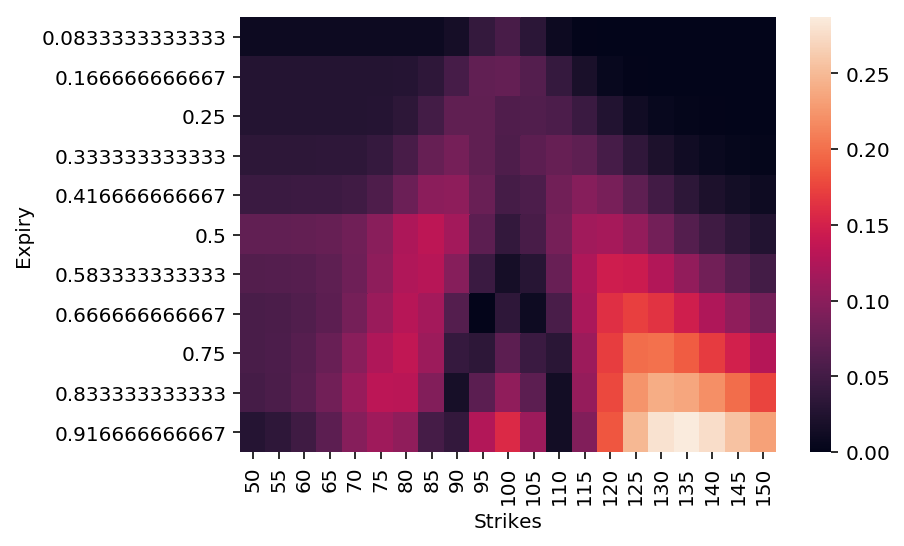

In [656]:
sns.heatmap(np.abs(f_pxs - pxs))

In [661]:
0.2/pxs.loc[11/12,100]

0.031951150197622846

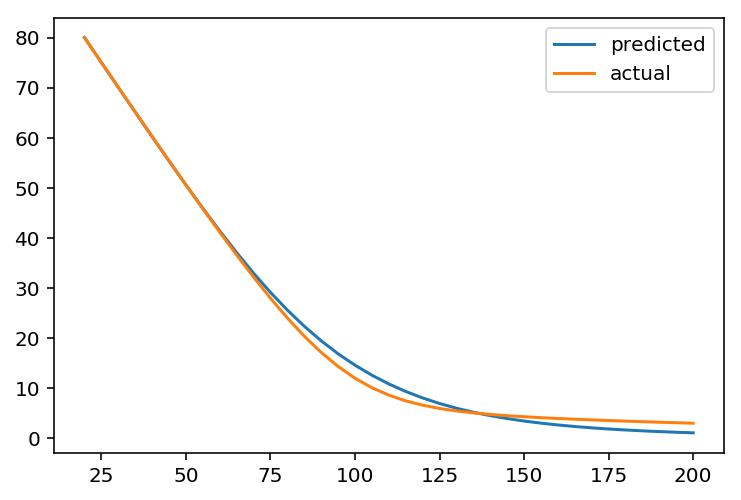

In [217]:
plt.plot(f_pxs.loc[3,:],label='predicted')
plt.plot(pxs.loc[3,:],label='actual')
plt.legend()

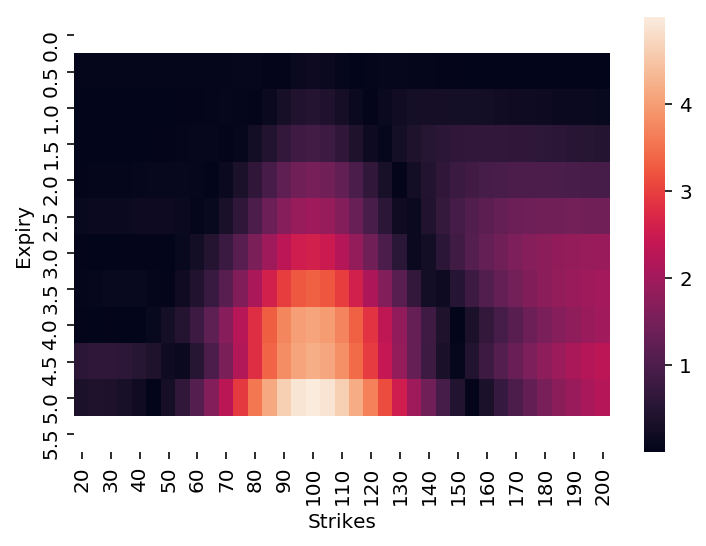

In [218]:
sns.heatmap(np.abs(f_pxs - pxs))

In [342]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=6)

features = poly.fit_transform(pxs.stack().reset_index().iloc[:,:2])

In [343]:
prices = pxs.stack().reset_index().iloc[:,2]


In [344]:
coeffs, _, _ , _ = np.linalg.lstsq(features, prices)

In [345]:
def eval_fit(expiry, strike):
    return poly.transform(np.array([expiry, strike]).reshape(1,-1))[0].dot(coeffs)

In [339]:
coeffs

array([  9.41689821e+01,   5.26543354e+00,  -6.78163376e-01,
        -1.09040419e+00,  -3.75994618e-01,   2.86273711e-03,
         3.47512340e-01,   3.01831732e-02,   8.40760072e-03,
        -2.97165643e-04,  -2.84823214e-02,  -4.99759497e-03,
        -7.39743732e-04,  -6.00130730e-05,   4.16852559e-06,
        -9.06562286e-03,   9.21867850e-04,   4.48845187e-05,
         5.29763703e-06,   1.27784089e-07,  -2.04471609e-08,
         1.09273095e-03,   5.34371020e-05,  -1.14535543e-05,
         1.45345359e-07,  -1.46579055e-08,   4.52881344e-11,
         3.40047990e-11])

In [349]:
X, Y = np.meshgrid(pxs.index, pxs.columns)

In [359]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [361]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,pxs.as_matrix().T)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [356]:
pxs.as_matrix().shape

(11, 37)